# 3) Red and White wine quality - Statistical analysis

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
red = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
white = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [7]:
red.shape

(1599, 12)

In [8]:
white.shape

(4898, 12)

In [9]:
red.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [10]:
white.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [11]:
#Function to select red or white dataset
def call(functionToCall):
    print('\nRed Wine\n')
    functionToCall(red)
    print('\nWhite Wine\n')
    functionToCall(white)

In [12]:
#Removing spaces from column names
def rm(wine_set):
    wine_set.columns = [x.strip().replace(' ','_') for x in wine_set.columns]
call(rm)


Red Wine


White Wine



In [13]:
#Sanity check
red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

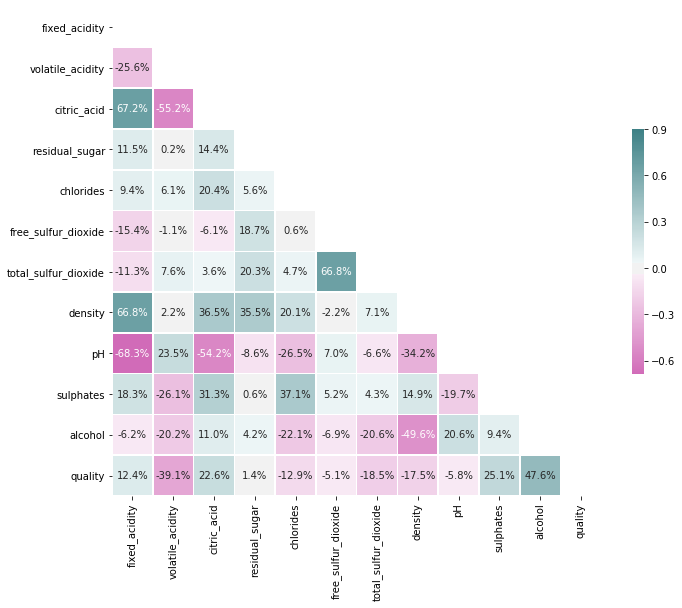

In [15]:
#Visualize correlation via heatmap
#Setting up correlation for our dataframe and passing it to seaborn heatmap function
corr = red.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(325, 200, as_cmap=True)
sns.heatmap(corr,annot=True, 
            fmt='.1%',
            mask=mask,
            cmap=cmap,
            vmax=.9,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={'shrink': .5});

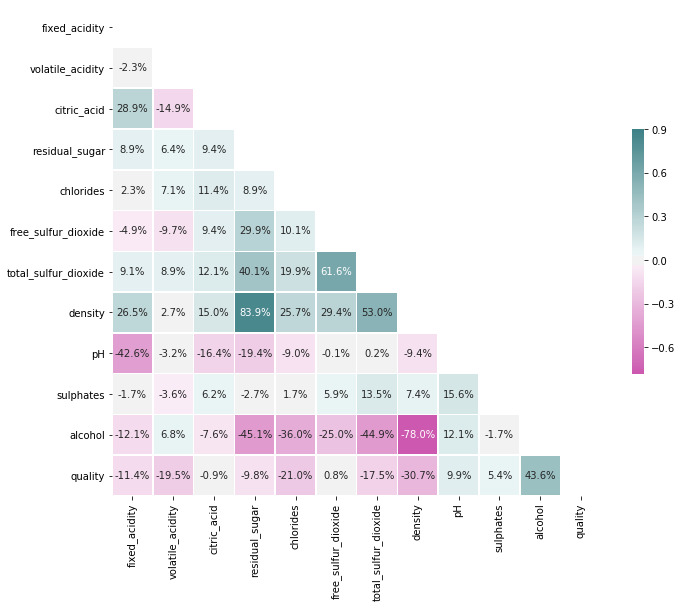

In [16]:
corr = white.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(325, 200, as_cmap=True)
sns.heatmap(corr,annot=True, 
            fmt='.1%',
            mask=mask,
            cmap=cmap,
            vmax=.9,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={'shrink': .5});

In [17]:
# Add a column 'quality_mark'
def add_categ_quality(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]
    
    low['quality_mark'] = 'low'
    medium['quality_mark'] = 'medium'
    high['quality_mark'] = 'high'
    
    frames = [low, medium, high]
    return pd.concat(frames)

## Hypothesis testing 

### ANOVA

In [19]:
# Calculating the F-statistics and associated p-value
def anova(wine_set):
    prepared_data = add_categ_quality(wine_set)
    model1 = smf.ols(formula='total_sulfur_dioxide ~ C(quality_mark)', data = prepared_data)
    results1 = model1.fit()
    print(results1.summary())
    
    sub = prepared_data[['total_sulfur_dioxide', 'quality_mark']]
    print('\nMean for total sulfur dioxide by quality marks of wine \n')
    print(sub.groupby('quality_mark').mean())
    print('\nStandard deviation for total sulfur dioxide by quality marks of wine \n')
    print(sub.groupby('quality_mark').std(), '\n')
    
    # Perform Post hoc test
    mc1 = multi.MultiComparison(sub['total_sulfur_dioxide'], sub['quality_mark'])
    res1 = mc1.tukeyhsd()
    print(res1.summary())
    
call(anova)


Red Wine

                             OLS Regression Results                             
Dep. Variable:     total_sulfur_dioxide   R-squared:                       0.054
Model:                              OLS   Adj. R-squared:                  0.053
Method:                   Least Squares   F-statistic:                     45.71
Date:                  Fri, 13 Sep 2019   Prob (F-statistic):           4.97e-20
Time:                          08:42:20   Log-Likelihood:                -7809.7
No. Observations:                  1599   AIC:                         1.563e+04
Df Residuals:                      1596   BIC:                         1.564e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

### Pearson's


Red Wine



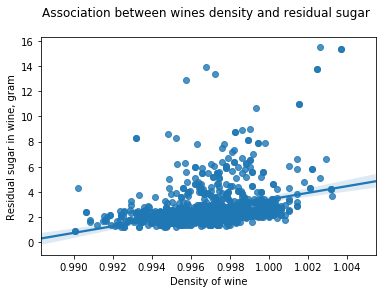

(0.3552833709833765, 9.013041728296711e-49)

White Wine



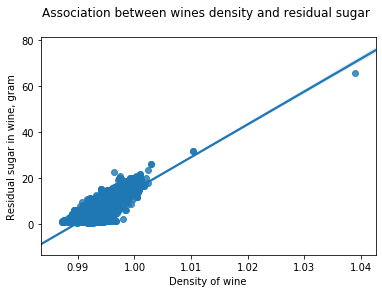

(0.8389664549045837, 0.0)


In [21]:
# Pearson Correlation
def pearson(wine_set):
    scat1 = sns.regplot(x = 'density', y = 'residual_sugar', fit_reg = True, data = wine_set)
    plt.xlabel('Density of wine')
    plt.ylabel('Residual sugar in wine, gram')
    plt.title('Association between wines density and residual sugar \n')
    plt.show()

    print(scipy.stats.pearsonr(wine_set['density'], wine_set['residual_sugar']))

call(pearson)

### Looking at statistical interactions in the dataset


Red Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.40512747741473687, 9.329990304727842e-31)

of `medium` quality
(0.33017251719442076, 9.754348168748099e-23)

of `high` quality
(0.5797231322874935, 0.011679205341894065)


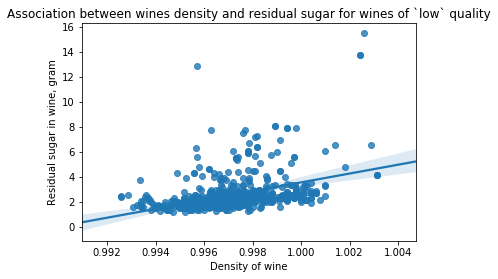

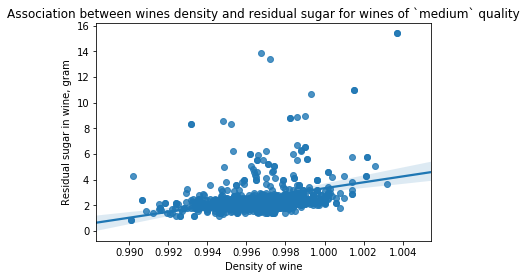

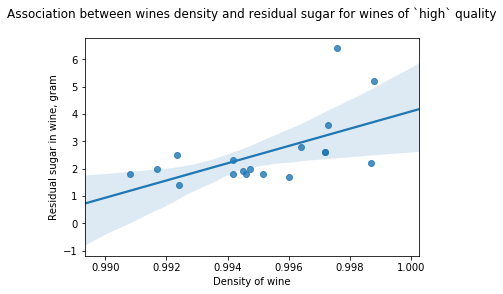


White Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.8796644895829154, 0.0)

of `medium` quality
(0.8458419941200984, 0.0)

of `high` quality
(0.8210870208105548, 3.274380626882737e-45)


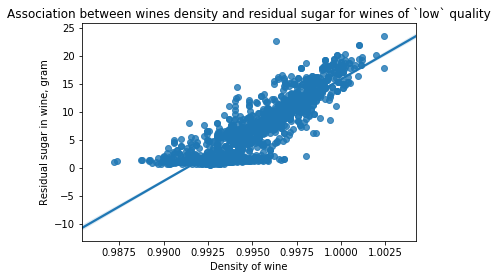

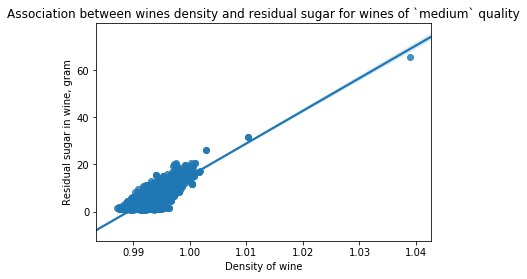

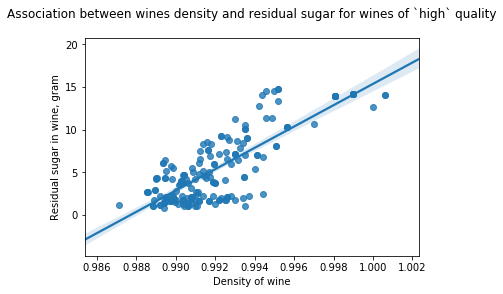

In [23]:
# Exploring Statistical Interactions
def explore(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]

    print('association between wine`s density and residual sugar for wines \nof `low` quality')
    print(scipy.stats.pearsonr(low['density'], low['residual_sugar']))
    print('\nof `medium` quality')
    print(scipy.stats.pearsonr(medium['density'], medium['residual_sugar']))
    print('\nof `high` quality')
    print(scipy.stats.pearsonr(high['density'], high['residual_sugar']))

    scat0 = sns.regplot(x='density', y='residual_sugar', fit_reg=True, data=low)
    plt.xlabel('Density of wine')
    plt.ylabel('Residual sugar in wine, gram')
    plt.title('Association between wines density and residual sugar for wines of `low` quality')
    plt.show()

    scat0 = sns.regplot(x='density', y='residual_sugar', fit_reg=True, data=medium)
    plt.xlabel('Density of wine')
    plt.ylabel('Residual sugar in wine, gram')
    plt.title('Association between wines density and residual sugar for wines of `medium` quality')
    plt.show()

    scat0 = sns.regplot(x='density', y='residual_sugar', fit_reg=True, data=high)
    plt.xlabel('Density of wine')
    plt.ylabel('Residual sugar in wine, gram')
    plt.title('Association between wines density and residual sugar for wines of `high` quality\n')
    plt.show()

call(explore)

In [24]:
def basicInfo(wine_set):
    print(len(wine_set))
    print(len(wine_set.columns))
    print(list(wine_set.columns.values))
    print(wine_set.ix[:10,:4])
    print('\n')
    print('--------------describe the data-----------------')
    print('\n')
    print(wine_set.describe())

call(basicInfo)


Red Wine

1599
12
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar
0             7.4              0.70         0.00             1.9
1             7.8              0.88         0.00             2.6
2             7.8              0.76         0.04             2.3
3            11.2              0.28         0.56             1.9
4             7.4              0.70         0.00             1.9
5             7.4              0.66         0.00             1.8
6             7.9              0.60         0.06             1.6
7             7.3              0.65         0.00             1.2
8             7.8              0.58         0.02             2.0
9             7.5              0.50         0.36             6.1
10            6.7              0.58         0.08             1.8


--------------de

### Frequency distribution

In [26]:
# print frequency distributions of wines' quality 
def frequencyDists(wine_set):
    print('This is the frequency distribution of the wines quality.')
    print(wine_set.groupby('quality').size()*100 / len(wine_set))
    print()

call(frequencyDists)


Red Wine

This is the frequency distribution of the wines quality.
quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
dtype: float64


White Wine

This is the frequency distribution of the wines quality.
quality
3     0.408330
4     3.327889
5    29.746835
6    44.875459
7    17.966517
8     3.572887
9     0.102082
dtype: float64



In [32]:
# print quartile split of the quality variable 
def quartileSplit(wine_set):
    print('This is the quartile split of the wines quality. First column contains the intervals of wines quality;')
    print('Second - the number of wine samples with the quality in the corresponding interval.')
    wine_set['quality_quart'] = pd.qcut(wine_set['quality'], 3)
    print(wine_set.groupby('quality_quart').size())

call(quartileSplit)


Red Wine

This is the quartile split of the wines quality. First column contains the intervals of wines quality;
Second - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    744
(5.0, 6.0]      638
(6.0, 8.0]      217
dtype: int64

White Wine

This is the quartile split of the wines quality. First column contains the intervals of wines quality;
Second - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    1640
(5.0, 6.0]      2198
(6.0, 9.0]      1060
dtype: int64



Red Wine



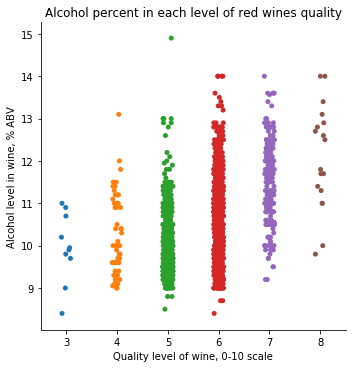


White Wine



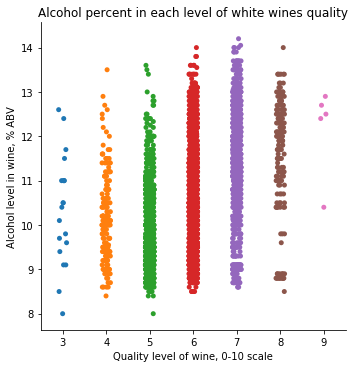

In [31]:
def factorplots(wine_set):
    sns.factorplot(x='quality', y='alcohol', data=wine_set, kind='strip')
    plt.xlabel('Quality level of wine, 0-10 scale')
    plt.ylabel('Alcohol level in wine, % ABV')
    if wine_set.equals(red):
        plt.title('Alcohol percent in each level of red wines quality')
    else:
        plt.title('Alcohol percent in each level of white wines quality')
    plt.show()

call(factorplots)

## Conclusions:
